# Cohort Analysis

In this assignment our job is to perform a cohort analysis on the customers of the company. We will group the customers into cohorts that are groups sharing common charecteristics. 

In [22]:
#loading the required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [23]:
# Load the datasets
online_sales = pd.read_csv('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Projects\\Marketing insights\\Online_Sales.csv')
discount_coupons = pd.read_csv('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Projects\\Marketing insights\\Discount_Coupon.csv')
tax_amount = pd.read_excel('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Projects\\Marketing insights\\Tax_amount.xlsx')

In [24]:
# Merging datasets using 'CustomerID' as the common key
merged_data = pd.merge(online_sales, discount_coupons, on='Product_Category', how='left')
merged_data = pd.merge(merged_data, tax_amount, on='Product_Category', how='left')

merged_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_name,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.1
1,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,ELEC20,20.0,0.1
2,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,ELEC30,30.0,0.1
3,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,ELEC10,10.0,0.1
4,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,ELEC20,20.0,0.1


In [25]:

#examining the merged dataset
merged_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_name,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.1
1,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,ELEC20,20.0,0.1
2,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,ELEC30,30.0,0.1
3,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,ELEC10,10.0,0.1
4,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,ELEC20,20.0,0.1


In [26]:
#getting information of the dataset
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 630688 entries, 0 to 630687
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        630688 non-null  int64  
 1   Transaction_ID    630688 non-null  int64  
 2   Transaction_Date  630688 non-null  int64  
 3   Product_SKU       630688 non-null  object 
 4   Product_name      630688 non-null  object 
 5   Product_Category  630688 non-null  object 
 6   Quantity          630688 non-null  int64  
 7   Avg_Price         630688 non-null  float64
 8   Delivery_Charges  630688 non-null  float64
 9   Coupon_Status     630688 non-null  object 
 10  Month             630288 non-null  object 
 11  Coupon_Code       630288 non-null  object 
 12  Discount_pct      630288 non-null  float64
 13  GST               630688 non-null  float64
dtypes: float64(4), int64(4), object(6)
memory usage: 72.2+ MB


In [27]:
# Calculating Invoice Value for each transaction in the merged dataset
merged_data['Invoice_Value'] = (
    (merged_data['Quantity'] * merged_data['Avg_Price']) *
    (1 - merged_data['Discount_pct']) *
    (1 + merged_data['GST']) +
    merged_data['Delivery_Charges']
).abs()


In [31]:
# Extracting relevant columns
cohort_data = merged_data[['CustomerID', 'Transaction_Date', 'Invoice_Value']]
cohort_data.head()

,CustomerID,Transaction_Date,Invoice_Value
0,17850,20190101,1515.229
1,17850,20190101,3206.039
2,17850,20190101,4896.849
3,17850,20190101,1515.229
4,17850,20190101,3206.039


In [32]:
# Convert 'Transaction_Date' in DataFrame to datetime data type
cohort_data['Transaction_Date'] = pd.to_datetime(merged_data['Transaction_Date'], format='%Y%m%d')
cohort_data['Transaction_Date']

C:\Users\sujoydutta\AppData\Local\Temp\ipykernel_6844\4112860847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_data['Transaction_Date'] = pd.to_datetime(merged_data['Transaction_Date'], format='%Y%m%d')


0        2019-01-01
1        2019-01-01
2        2019-01-01
3        2019-01-01
4        2019-01-01
            ...    
630683   2019-12-31
630684   2019-12-31
630685   2019-12-31
630686   2019-12-31
630687   2019-12-31
Name: Transaction_Date, Length: 630688, dtype: datetime64[ns]

In [33]:
# Calculating the first purchase month for each customer
cohort_data['FirstPurchaseMonth'] = cohort_data.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')
cohort_data['FirstPurchaseMonth'] 

C:\Users\sujoydutta\AppData\Local\Temp\ipykernel_6844\1830222443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_data['FirstPurchaseMonth'] = cohort_data.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')


0         2019-01
1         2019-01
2         2019-01
3         2019-01
4         2019-01
           ...   
630683    2019-12
630684    2019-12
630685    2019-12
630686    2019-12
630687    2019-12
Name: FirstPurchaseMonth, Length: 630688, dtype: period[M]

In [34]:
# Getting the cohort index based on the number of months since the first purchase
cohort_data['CohortIndex'] = (
    (cohort_data['Transaction_Date'].dt.to_period('M') - cohort_data['FirstPurchaseMonth']).apply(lambda x: x.n) + 1
)
cohort_data['CohortIndex']

C:\Users\sujoydutta\AppData\Local\Temp\ipykernel_6844\747533931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_data['CohortIndex'] = (


0         1
1         1
2         1
3         1
4         1
         ..
630683    1
630684    1
630685    1
630686    1
630687    1
Name: CohortIndex, Length: 630688, dtype: int64

In [35]:
# Group the data by the first purchase month and cohort index
cohort_data = cohort_data.groupby(['FirstPurchaseMonth', 'CohortIndex']).agg(
    TotalCustomers=('CustomerID', 'nunique'),
    TotalRevenue=('Invoice_Value', 'sum')
).reset_index()
cohort_data.round()


,FirstPurchaseMonth,CohortIndex,TotalCustomers,TotalRevenue
0,2019-01,1,215,101071550.0
1,2019-01,2,13,9882640.0
2,2019-01,3,24,11300315.0
3,2019-01,4,34,28921521.0
4,2019-01,5,23,7263371.0
...,...,...,...,...
73,2019-10,2,6,2390306.0
74,2019-10,3,4,682336.0
75,2019-11,1,68,53840226.0
76,2019-11,2,7,1102275.0


In [36]:
# Creating a pivot table to represent the cohort analysis
cohorts = cohort_data.pivot_table(
    index=['FirstPurchaseMonth'],
    columns='CohortIndex',
    values='TotalCustomers'
)
cohorts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
FirstPurchaseMonth,,,,,,,,,,,,
2019-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
2019-03,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
2019-04,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
2019-05,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
2019-06,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
2019-07,94.0,13.0,4.0,6.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,135.0,14.0,15.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Calculating the retention rates for each cohort over time
cohort_size = cohorts.iloc[:, 0]
retention = cohorts.divide(cohort_size, axis=0)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
FirstPurchaseMonth,,,,,,,,,,,,
2019-01,1.0,0.060465,0.111628,0.158140,0.106977,0.204651,0.162791,0.218605,0.106977,0.130233,0.093023,0.15814
2019-02,1.0,0.072917,0.093750,0.166667,0.177083,0.229167,0.197917,0.156250,0.125000,0.114583,0.166667,NaN
2019-03,1.0,0.101695,0.197740,0.141243,0.180791,0.186441,0.124294,0.124294,0.084746,0.107345,NaN,NaN
2019-04,1.0,0.085890,0.147239,0.147239,0.110429,0.092025,0.061350,0.098160,0.073620,NaN,NaN,NaN
2019-05,1.0,0.107143,0.080357,0.116071,0.089286,0.116071,0.125000,0.071429,NaN,NaN,NaN,NaN
2019-06,1.0,0.145985,0.160584,0.087591,0.080292,0.102190,0.080292,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.138298,0.042553,0.063830,0.117021,0.095745,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.103704,0.111111,0.074074,0.059259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.076923,0.038462,0.025641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


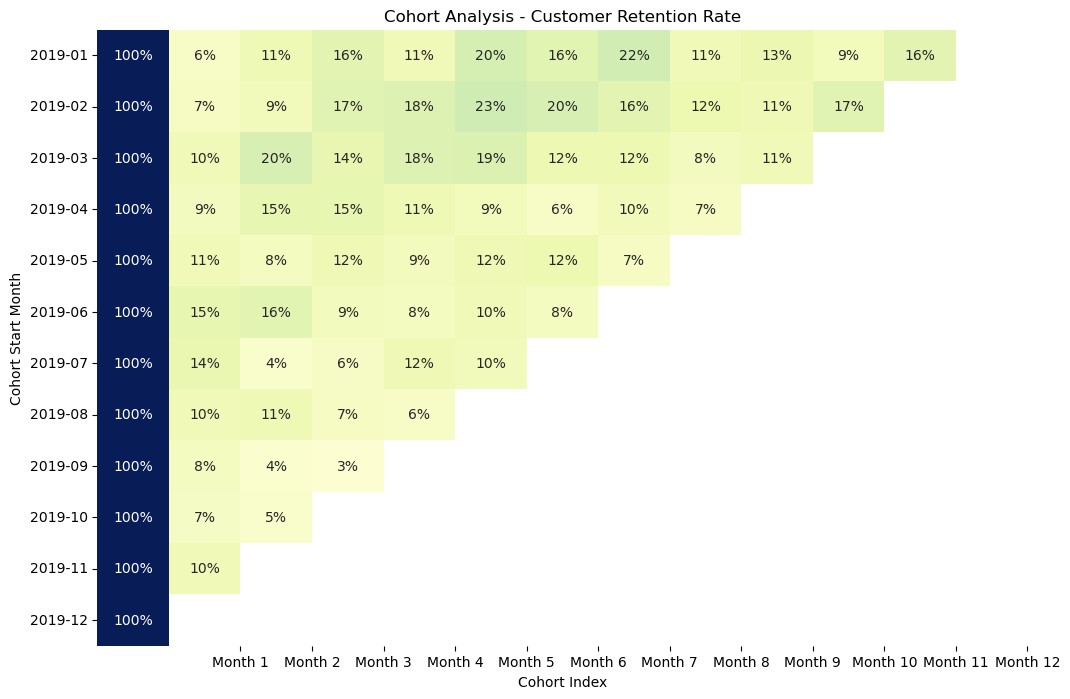

In [38]:
# Creating a heatmap to visualize cohort retention rates
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis - Customer Retention Rate')
sb.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu', vmin=0, vmax=1, cbar=False)
plt.xticks(1 + retention.columns.values, [f'Month {i}' for i in range(1, len(retention.columns) + 1)])
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Start Month')
plt.show()

In [39]:
# Remove rows with NaN values from the cohort table
cohort_data = cohort_data.dropna()

# Reset the index of the DataFrame
cohort_data.reset_index(drop=True, inplace=True)


In [40]:
#viewing the cleaned cohort data
cohort_data.round()

,FirstPurchaseMonth,CohortIndex,TotalCustomers,TotalRevenue
0,2019-01,1,215,101071550.0
1,2019-01,2,13,9882640.0
2,2019-01,3,24,11300315.0
3,2019-01,4,34,28921521.0
4,2019-01,5,23,7263371.0
...,...,...,...,...
73,2019-10,2,6,2390306.0
74,2019-10,3,4,682336.0
75,2019-11,1,68,53840226.0
76,2019-11,2,7,1102275.0


In [41]:
# Cohort metrics table
cohort_metrics = cohort_data.pivot_table(index=[ 'FirstPurchaseMonth'], columns='CohortIndex', values=['TotalCustomers', 'TotalRevenue'])


cohort_metrics

TotalCustomers                                            \
CohortIndex                    1     2     3     4     5     6     7     8    
FirstPurchaseMonth                                                            
2019-01                     215.0  13.0  24.0  34.0  23.0  44.0  35.0  47.0   
2019-02                      96.0   7.0   9.0  16.0  17.0  22.0  19.0  15.0   
2019-03                     177.0  18.0  35.0  25.0  32.0  33.0  22.0  22.0   
2019-04                     163.0  14.0  24.0  24.0  18.0  15.0  10.0  16.0   
2019-05                     112.0  12.0   9.0  13.0  10.0  13.0  14.0   8.0   
2019-06                     137.0  20.0  22.0  12.0  11.0  14.0  11.0   NaN   
2019-07                      94.0  13.0   4.0   6.0  11.0   9.0   NaN   NaN   
2019-08                     135.0  14.0  15.0  10.0   8.0   NaN   NaN   NaN   
2019-09                      78.0   6.0   3.0   2.0   NaN   NaN   NaN   NaN   
2019-10                      87.0   6.0   4.0   NaN   NaN   NaN   NaN   NaN   
2019-11                      68.0   7.0   NaN   NaN   NaN   NaN   NaN   NaN   
2019-12                     106.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                                ...  TotalRevenue                              \
CohortIndex           9     10  ...            3             4             5    
FirstPurchaseMonth              ...                                             
2019-01             23.0  28.0  ...  1.130031e+07  2.892152e+07  7.263371e+06   
2019-02             12.0  11.0  ...  3.185927e+06  5.464640e+06  5.901013e+06   
2019-03             15.0  19.0  ...  9.076607e+06  7.720443e+06  1.149867e+07   
2019-04             12.0   NaN  ...  4.195253e+06  7.428573e+06  6.280578e+06   
2019-05              NaN   NaN  ...  2.982523e+06  3.534678e+06  4.296835e+06   
2019-06              NaN   NaN  ...  3.194789e+06  3.781086e+06  2.510709e+06   
2019-07              NaN   NaN  ...  1.810631e+06  3.654439e+06  5.981508e+06   
2019-08              NaN   NaN  ...  2.741047e+06  7.144423e+06  4.141043e+06   
2019-09              NaN   NaN  ...  6.298675e+05  1.611835e+05           NaN   
2019-10              NaN   NaN  ...  6.823357e+05           NaN           NaN   
2019-11              NaN   NaN  ...           NaN           NaN           NaN   
2019-12              NaN   NaN  ...           NaN           NaN           NaN   

                                                                            \
CohortIndex                   6             7             8             9    
FirstPurchaseMonth                                                           
2019-01             1.303335e+07  2.108239e+07  1.257383e+07  1.011180e+07   
2019-02             1.044326e+07  5.531927e+06  1.131620e+07  4.255940e+06   
2019-03             1.752918e+07  1.216914e+07  9.870306e+06  6.128743e+06   
2019-04             7.573408e+06  3.899688e+06  1.404745e+07  4.507513e+06   
2019-05             8.957424e+06  9.425838e+06  2.844875e+06           NaN   
2019-06             9.131961e+06  3.841362e+06           NaN           NaN   
2019-07             7.220105e+06           NaN           NaN           NaN   
2019-08                      NaN           NaN           NaN           NaN   
2019-09                      NaN           NaN           NaN           NaN   
2019-10                      NaN           NaN           NaN           NaN   
2019-11                      NaN           NaN           NaN           NaN   
2019-12                      NaN           NaN           NaN           NaN   

                                                              
CohortIndex                   10            11            12  
FirstPurchaseMonth                                            
2019-01             1.137587e+07  1.005317e+07  2.335284e+07  
2019-02             7.150164e+06  1.186108e+07           NaN  
2019-03             9.070328e+06           NaN           NaN  
2019-04                      NaN           NaN           NaN  
2019-

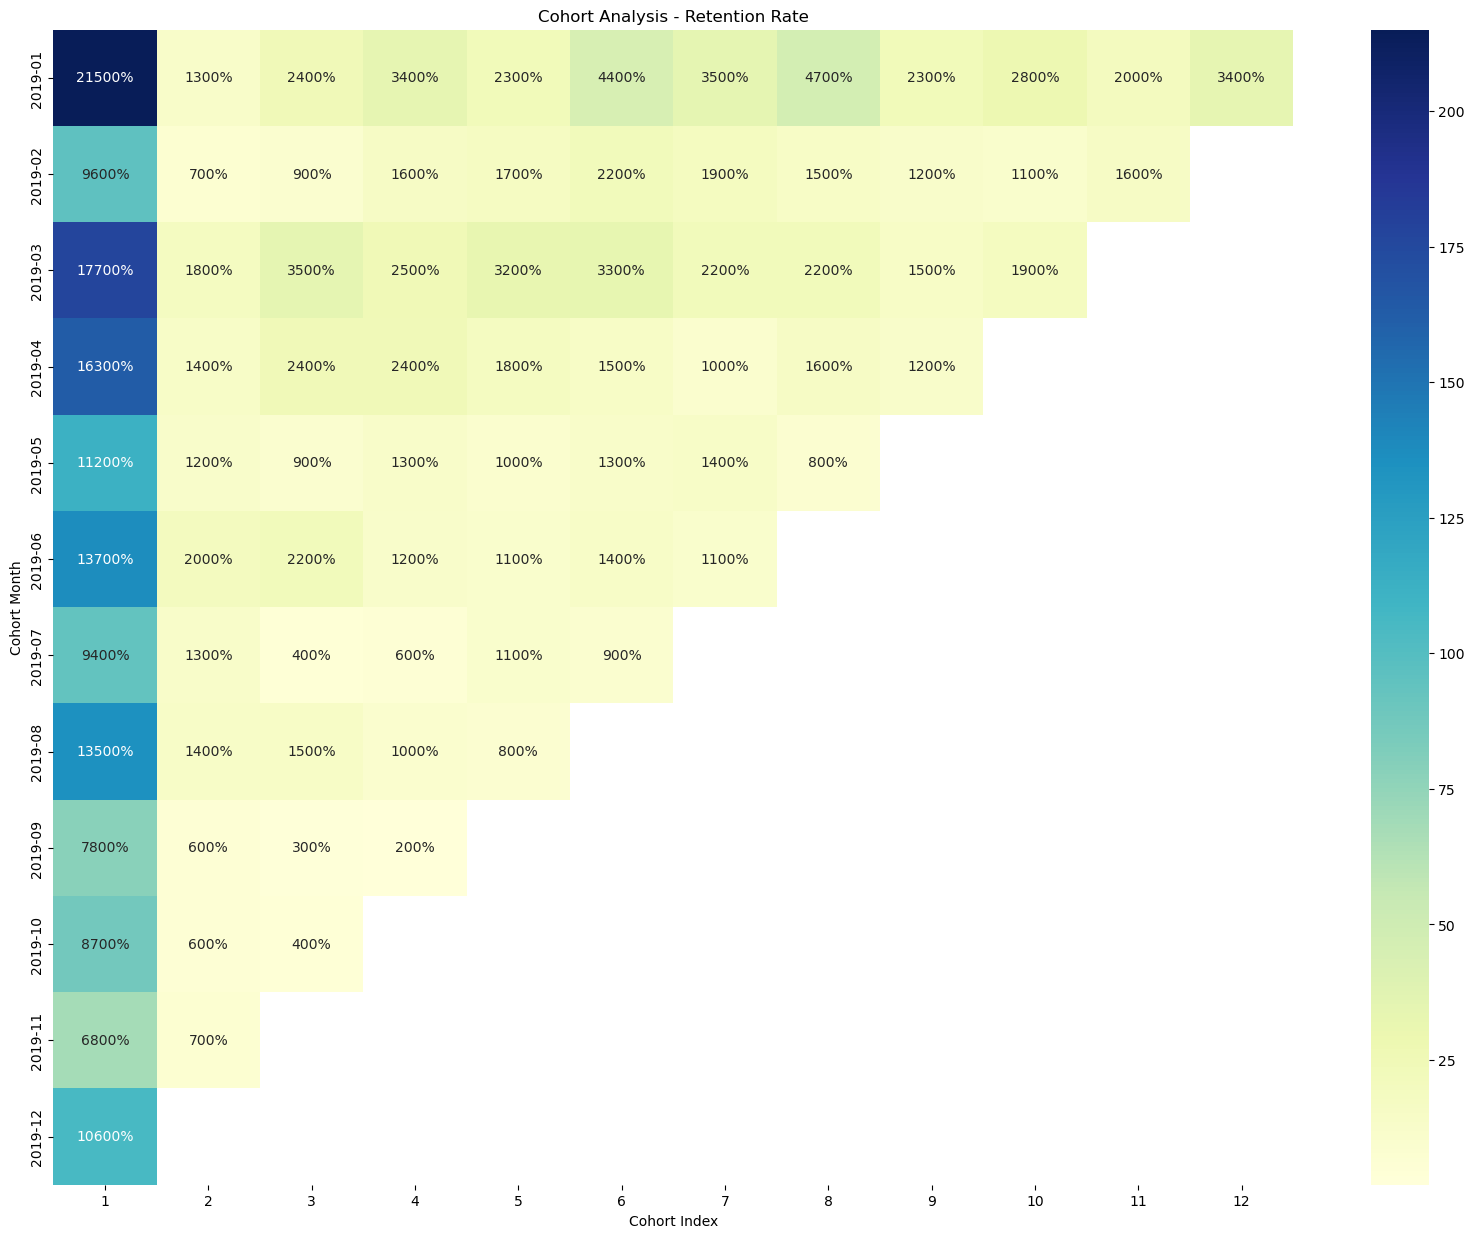

In [42]:
# Making a heatmap for retention rate
plt.figure(figsize=(20,15))
sb.heatmap(cohort_metrics['TotalCustomers'], annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Cohort Analysis - Retention Rate')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

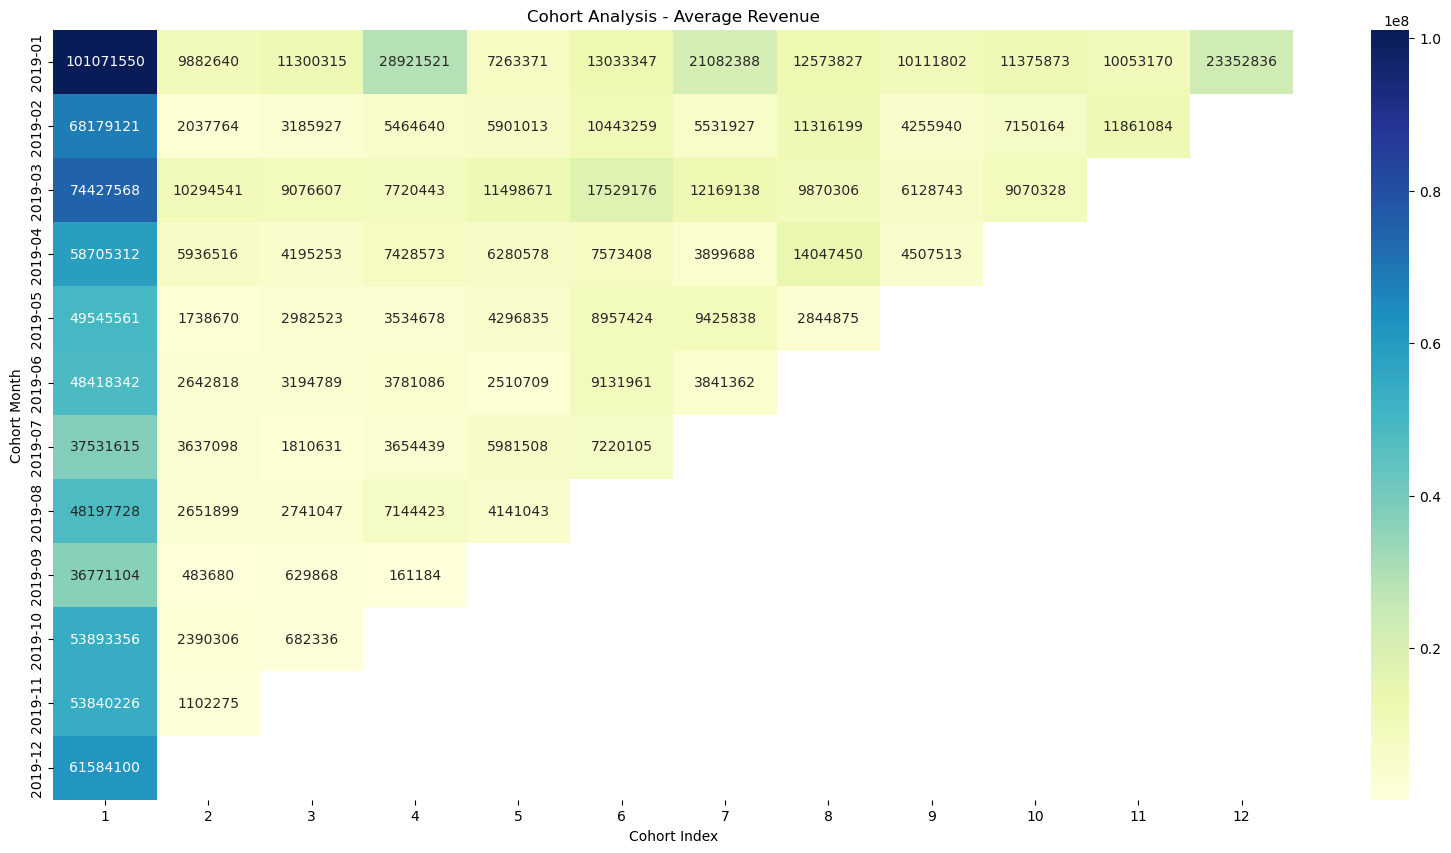

In [43]:
# Creating a heatmap for average revenue
plt.figure(figsize=(20, 10))
sb.heatmap(cohort_metrics['TotalRevenue'], annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Cohort Analysis - Average Revenue')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

**Remark:** The first cohort is by far the best performing cohort in terms of retention rate and revenue.